## Giancarlo's Implementation
https://github.com/giangamberi/Estudo-de-algoritmos-quanticos-e-suas-implementacoes/blob/main/EAQSI.ipynb
https://dspace.mackenzie.br/items/071a8df2-1a8f-45c2-ab22-49749d06479b

In [ ]:
!pip install qiskit-aer
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit_aer
!pip install pylatexenc
!pip install tweedledum
!pip install qiskit-algorithms


In [ ]:
import numpy as np
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import AerProvider, AerSimulator
from qiskit.quantum_info import Statevector

from qiskit.providers.basic_provider import BasicProvider
from qiskit.quantum_info import Statevector

from qiskit.circuit.library import DiagonalGate
from qiskit.circuit.library import Diagonal
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2 as Estimator
from qiskit.circuit.library import PhaseOracle

#plot
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import array_to_latex

# Output
outputType = "mpl"

def convertDiagonal(number, qubits):
    diagonalSize = pow(2,qubits)
    if (diagonalSize < number - 1): return -1
    aux = np.ones(diagonalSize, dtype=int) # Criacao um array do tamanho da qtd de 2 qubits
    aux[number] = -1
    return aux

def startSobreposition(qc: QuantumCircuit, qubits: list):
    for q in qubits: qc.h(q)
    return qc


# Aqui podemos imprimir o vetor de estados facilmente
def printStateVector(qc: QuantumCircuit) -> Statevector:
    qc.remove_final_measurements()  # no measurements allowed
    statevector = Statevector(qc)
    return array_to_latex(statevector, prefix="\\text{Statevector} = ")

def difusionMatrix(qc: QuantumCircuit, qubits: list, qubit_qtd: int):
    # Difusion => Hadamard . Diagonal . Hadamard
    # D = W R W
    R = np.ones(int(pow(2, len(qubits)))) # R = [1,1,1] c/ tamanho de qtd de qubits ** 2
    for i in range(1, pow(2, qubit_qtd)):
        R[i] = -1
    startSobreposition(qc, qubits)
    qc &= Diagonal(list(R))
    startSobreposition(qc, qubits)
    return qc




In [ ]:
# Montagem da diagonal
qubit_qtd = 4
allQbits = [i for i in range(qubit_qtd)]

targetNumber = 0 # estado 100
groverDiagonal = list(convertDiagonal(targetNumber, qubit_qtd))
array_to_latex(groverDiagonal, prefix="\\text{Diagonal} = ")


<IPython.core.display.Latex object>

In [ ]:
# Montagem do circuito inicial: Hadamard -> Diagonal


# algoritmoGrover = QuantumCircuit(qubit_qtd)
# algoritmoGrover = startSobreposition(algoritmoGrover, allQbits)
# algoritmoGrover &= Diagonal(groverDiagonal)

algoritmoGrover = PhaseOracle.from_dimacs_file("expressio.cnf")

print(algoritmoGrover.draw())

                     
q_0: ─■───────o──────
      │ ┌───┐ │ ┌───┐
q_1: ─■─┤ X ├─■─┤ X ├
      │ └───┘   └───┘
q_2: ─o───────■──────
      │ ┌───┐ │      
q_3: ─o─┤ Z ├─o──────
        └───┘        


# Vetor de Estados obtido após a construção do circuito

In [ ]:
printStateVector(algoritmoGrover)

<IPython.core.display.Latex object>

In [ ]:
# Criação da matriz de difusão
# W R W
mtx = QuantumCircuit(qubit_qtd)
mtx.Name = "difusionMatrix"
print(difusionMatrix(mtx, allQbits, qubit_qtd))


     ┌───┐┌───────────┐┌───┐
q_0: ┤ H ├┤0          ├┤ H ├
     ├───┤│           │├───┤
q_1: ┤ H ├┤1          ├┤ H ├
     ├───┤│  Diagonal │├───┤
q_2: ┤ H ├┤2          ├┤ H ├
     ├───┤│           │├───┤
q_3: ┤ H ├┤3          ├┤ H ├
     └───┘└───────────┘└───┘


In [ ]:
# Aplicando matriz de difusao de Grover ao circuito
algoritmoGrover.append(mtx, allQbits)
algoritmoGrover.measure_all()
algoritmoGrover.draw()

┌──────────────┐ ░ ┌─┐         ┌──────────────┐ ░ ┌─┐»
    q_0: ─■───────o──────┤0             ├─░─┤M├─────────┤0             ├─░─┤M├»
          │ ┌───┐ │ ┌───┐│              │ ░ └╥┘┌─┐      │              │ ░ └╥┘»
    q_1: ─■─┤ X ├─■─┤ X ├┤1             ├─░──╫─┤M├──────┤1             ├─░──╫─»
          │ └───┘   └───┘│  circuit-194 │ ░  ║ └╥┘┌─┐   │  circuit-194 │ ░  ║ »
    q_2: ─o───────■──────┤2             ├─░──╫──╫─┤M├───┤2             ├─░──╫─»
          │ ┌───┐ │      │              │ ░  ║  ║ └╥┘┌─┐│              │ ░  ║ »
    q_3: ─o─┤ Z ├─o──────┤3             ├─░──╫──╫──╫─┤M├┤3             ├─░──╫─»
            └───┘        └──────────────┘ ░  ║  ║  ║ └╥┘└──────────────┘ ░  ║ »
 meas: 4/════════════════════════════════════╩══╩══╩══╩═════════════════════╬═»
                                             0  1  2  3                     ║ »
meas1: 4/═══════════════════════════════════════════════════════════════════╩═»
                                                                            0 »
«                  
«    q_0: ─────────
«         ┌─┐      
«    q_1: ┤M├──────
«         └╥┘┌─┐   
«    q_2: ─╫─┤M├───
«          ║ └╥┘┌─┐
«    q_3: ─╫──╫─┤M├
«          ║  ║ └╥┘
« meas: 4/═╬══╬══╬═
«          ║  ║  ║ 
«meas1: 4/═╩══╩══╩═
«          1  2  3

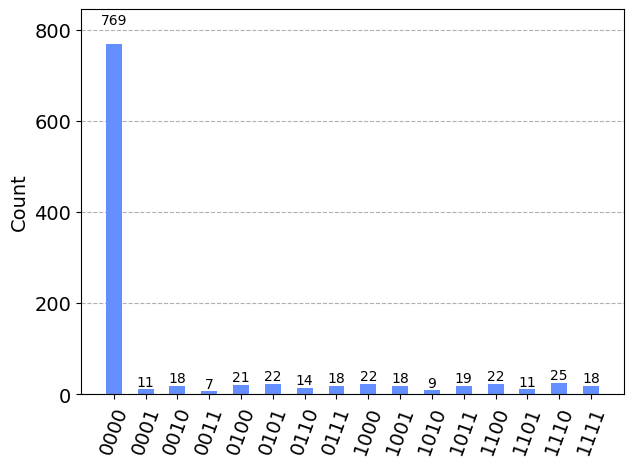

In [ ]:
# Plot do resultado
backend = BasicProvider().get_backend("basic_simulator")


transpiled_algoritmoGrover = transpile(algoritmoGrover, backend)
qobj = assemble(transpiled_algoritmoGrover)
result = backend.run(transpiled_algoritmoGrover).result()
count = result.get_counts()
plot_histogram(count)

In [ ]:
# Experimentos
from qiskit.circuit.library import GroverOperator
from qiskit.primitives import BackendSampler
from qiskit_algorithms import Grover



oracle = PhaseOracle.from_dimacs_file("expressio.cnf")

grover = GroverOperator(oracle)
grover.decompose().draw()


result = transpile(grover.decompose(), backend)
job = backend.run(result)


# sampler = BackendSampler(backend)
# job = sampler.run(grover)

In [ ]:
# Experimentos 2
# Experimentos
from qiskit.circuit.library import GroverOperator
from qiskit.primitives import BackendSampler
from qiskit.primitives import Sampler
from qiskit_algorithms import Grover, AmplificationProblem



oracle = PhaseOracle.from_dimacs_file("expressio.cnf")


sampler = Sampler()

problem = AmplificationProblem(oracle)
grover = Grover(sampler = sampler, iterations=1204)
result = grover.amplify(problem)
result.circuit_results

[{'0000': 0.0767033004737965,
  '0001': 0.0312527389571839,
  '0010': 0.0312527389571858,
  '0011': 0.0767033004737955,
  '0100': 0.0312527389571841,
  '0101': 0.0767033004737958,
  '0110': 0.0767033004737966,
  '0111': 0.076703300473797,
  '1000': 0.0312527389571848,
  '1001': 0.0767033004737945,
  '1010': 0.076703300473794,
  '1011': 0.0767033004737952,
  '1100': 0.0312527389571846,
  '1101': 0.076703300473795,
  '1110': 0.0767033004737925,
  '1111': 0.0767033004737949}]

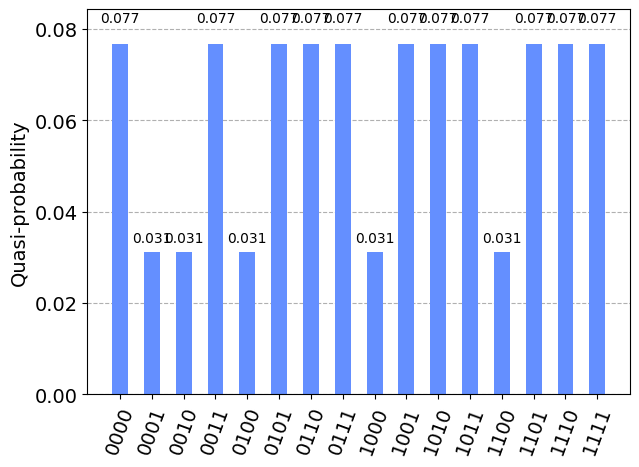

In [ ]:
  display(plot_histogram(result.circuit_results))
  # respostas satisfatorias